# Chapter 04 [모델 훈련]

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Chapter 04 [training_linear_models]"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 4.1 선형 회귀

### 4.1.1 정규방정식

<center>$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$</center>

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)   # rand : 0부터 1 사이에서 균일한 확률분포로 실수 난수를 생성
y = 4 + 3 * X + np.random.randn(100, 1)   # randn : 기댓값이 0이고 표준편차가 1인 가우시안 표준정규분포를 따르는 난수를 생성

In [3]:
# X

In [4]:
# y

그림 저장: generated_data_plot


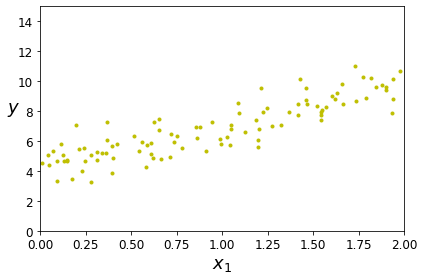

In [5]:
plt.plot(X, y, "y.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [6]:
X_b = np.c_[np.ones((100, 1)), X]   # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.21509616],
       [2.77011339]])

<center>$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$</center>

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]   # 모든 샘플에 x0 = 1을 추가

X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b.dot(theta_best)

y_predict

array([[4.21509616],
       [9.75532293]])

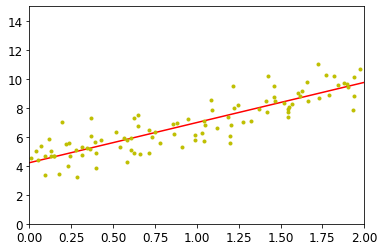

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
# 유사역행렬 계산
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 4.2 경사 하강법